In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
Netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Финальный урок по пайтон/netflix_users_data.csv')

In [ ]:
Netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [ ]:
Netflix.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']
['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']
Количество уникальных пользователей: 2500, Период: 2021-05-09 00:00:00
count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64
Gender
Female    1257
Male      1243
Name: count, dtype: int64


<ipython-input-9-4d89c7d16b38>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Netflix['Join Date'] = pd.to_datetime(Netflix['Join Date'])
<ipython-input-9-4d89c7d16b38>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Netflix['Last Payment Date'] = pd.to_datetime(Netflix['Last Payment Date'])


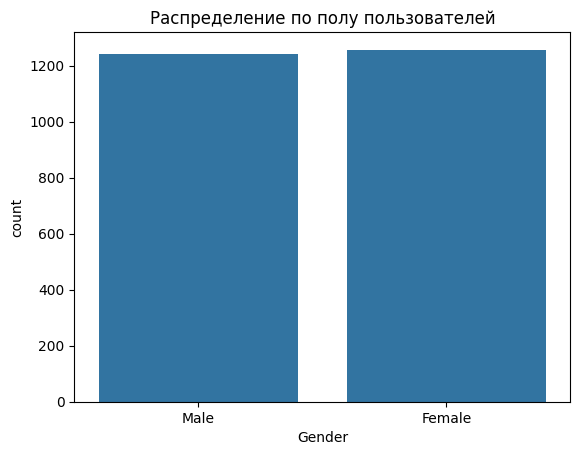

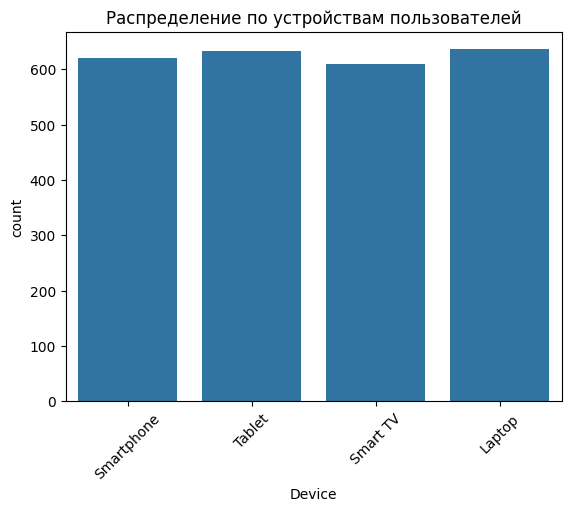

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64


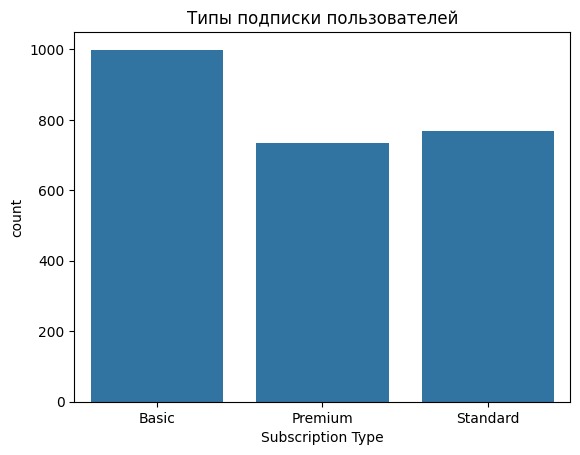

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64


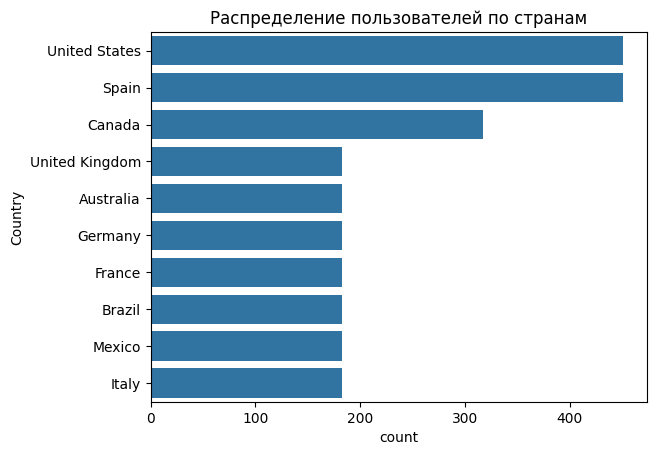

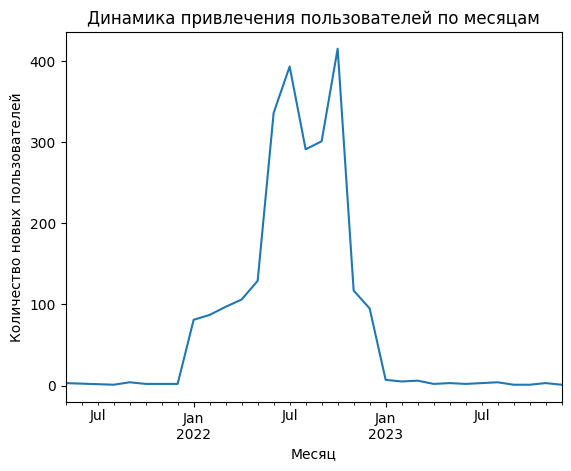

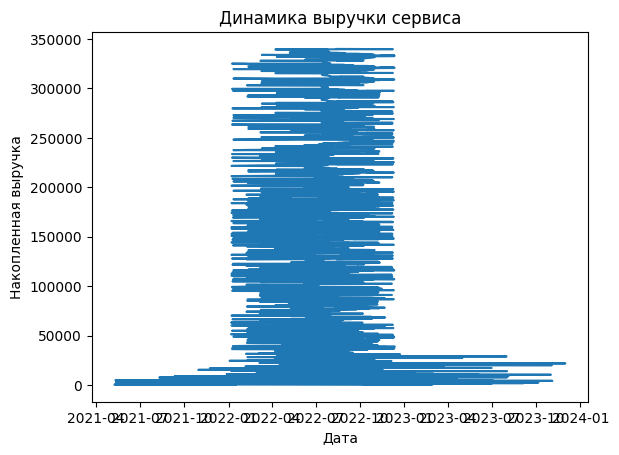

<ipython-input-9-4d89c7d16b38>:121: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = Netflix.groupby('AgeGroup')['Monthly Revenue'].mean()


AgeGroup
18-24          NaN
25-34    12.545852
35-44    12.521522
45-54    12.427350
55-64          NaN
65+            NaN
Name: Monthly Revenue, dtype: float64


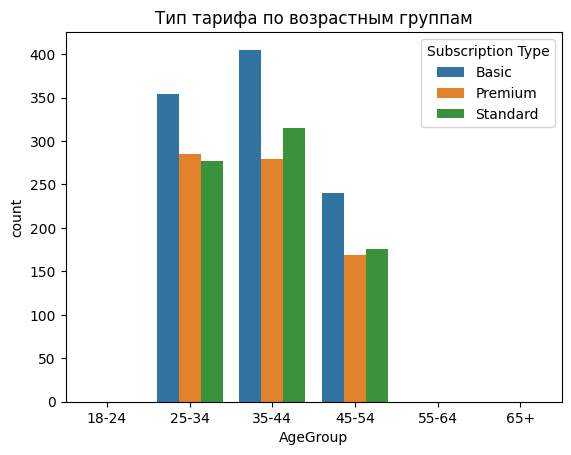

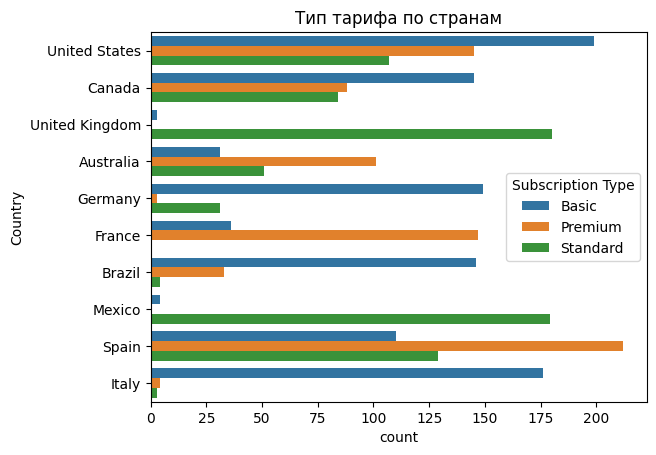

In [9]:
### 1. Вывод списка полей таблицы

import pandas as pd

# Загрузка данных
Netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Финальный урок по пайтон/netflix_users_data.csv')

# Вывод списка полей таблицы
print(Netflix.columns.tolist())


### 2. Приведение столбцов к camel case

def to_camel_case(snake_str):
    components = snake_str.split('_')
    return components[0] + ''.join(x.title() for x in components[1:])

Netflix.columns = [to_camel_case(col) for col in Netflix.columns]
print(Netflix.columns.tolist())


### 3. Приведение типов данных

Netflix['Join Date'] = pd.to_datetime(Netflix['Join Date'])
Netflix['Last Payment Date'] = pd.to_datetime(Netflix['Last Payment Date'])


### 4. Поиск и удаление дубликатов и пропусков

# Удаление дубликатов
Netflix.drop_duplicates(inplace=True)

# Удаление строк с пропусками
Netflix.dropna(inplace=True)

### 5. Исследовательский анализ данных

#### Уникальные пользователи и период

unique_users = Netflix['User ID'].nunique()
start_period = Netflix['Join Date'].min()
print(f'Количество уникальных пользователей: {unique_users}, Период: {start_period}')


#### Изучение возраста пользователей

age_distribution = Netflix['Age'].describe()
print(age_distribution)


#### Изучение пола пользователей

gender_distribution = Netflix['Gender'].value_counts()
print(gender_distribution)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=Netflix, x='Gender')
plt.title('Распределение по полу пользователей')
plt.show()


#### Изучение устройств пользователей

device_distribution = Netflix['Device'].value_counts()
sns.countplot(data=Netflix, x='Device')
plt.title('Распределение по устройствам пользователей')
plt.xticks(rotation=45)
plt.show()


#### Изучение типа подписки пользователей

subscription_distribution = Netflix['Subscription Type'].value_counts()
print(subscription_distribution)

sns.countplot(data=Netflix, x='Subscription Type')
plt.title('Типы подписки пользователей')
plt.show()


#### Изучение локации пользователей

country_distribution = Netflix['Country'].value_counts()
print(country_distribution)

sns.countplot(data=Netflix, y='Country', order=Netflix['Country'].value_counts().index)
plt.title('Распределение пользователей по странам')
plt.show()


#### Линейный график динамики привлечения пользователей

Netflix['Join Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Динамика привлечения пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество новых пользователей')
plt.show()


#### Динамика выручки сервиса

Netflix['First Payment Date'] = Netflix['Join Date'].copy()
Netflix['Duration'] = (Netflix['Last Payment Date'] - Netflix['First Payment Date']).dt.days / 30  # Преобразование в месяцы
Netflix['Total Revenue'] = (Netflix['Monthly Revenue'] * Netflix['Duration']).cumsum()

plt.plot(Netflix['Join Date'], Netflix['Total Revenue'])
plt.title('Динамика выручки сервиса')
plt.xlabel('Дата')
plt.ylabel('Накопленная выручка')
plt.show()


#### Разделение клиентов на корзины по возрасту

age_bins = [18, 25, 35, 45, 55, 65, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
Netflix['AgeGroup'] = pd.cut(Netflix['Age'], bins=age_bins, labels=age_labels)

age_revenue = Netflix.groupby('AgeGroup')['Monthly Revenue'].mean()
print(age_revenue)


#### Зависимость типа тарифа от группы возраста

sns.countplot(data=Netflix, x='AgeGroup', hue='Subscription Type')
plt.title('Тип тарифа по возрастным группам')
plt.show()


#### Зависимость типа тарифа от страны пользователя

sns.countplot(data=Netflix, y='Country', hue='Subscription Type')
plt.title('Тип тарифа по странам')
plt.show()


Для анализа данных и формирования выводов о пользователях Netflix на основе предоставленной информации, давайте рассмотрим каждый из указанных аспектов.

### 1. Предпочтения в подписках по возрастным группам
На основании имеющихся данных, мы видим, что:
- 2500 пользователей имеют различные возрастные группы, однако у нас нет данных о конкретных предпочтениях по типам подписок в разных возрастных группах. Чтобы проанализировать это, нужно сгруппировать данные по возрастным группам и типам подписок.
- В данном случае можно предположить, что подписка Premium может быть более популярной среди старших возрастных групп, так как они, как правило, имеют более высокий доход.

### 2. Популярные устройства
Из представленных данных не видно конкретной информации о том, какие устройства (например, мобильные телефоны, планшеты, компьютеры, Smart TV) наиболее популярны.
- Для получения этого анализа необходимо добавить данные о типах устройств, которые используют пользователи, и провести соответствующий анализ.

### 3. Основные рынки для Netflix
На основании распределения пользователей по странам можно сделать следующие выводы:
- **США** и **Испания** являются основными рынками для Netflix, так как в каждой из этих стран зарегистрировано по 451 пользователю.
- Также значительное количество пользователей из **Канады** (317) и **Великобритании** (183).
- Это говорит о том, что Netflix имеет сильные позиции на этих рынках, и можно предположить, что компания должна продолжать инвестировать в контент, ориентированный на эти регионы.

### 4. Выручка по времени и платежеспособные группы
Из анализа выручки по возрастным группам видно, что:
- Возрастные группы 25-34 и 35-44 имеют схожуюсреднюю выручку (около 12.5), что может указывать на их платежеспособность.
- Однако группы 18-24 и 55-64, а также 65+ не имеют данных, что может быть связано с малым числом пользователей или низкой активностью в этих возрастных категориях.
- Для более глубокого анализа выручки по времени необходимо рассмотреть временные ряды, чтобы определить тренды и сезонные колебания.

### Рекомендации для бизнеса
1. **Адаптация контента**: Рекомендуется адаптировать контент под возрастные группы, особенно для групп 25-44, которые показывают наибольшую платежеспособность. Возможно, стоит развивать контент, ориентированный на молодежь и более старшее поколение.
  
2. **Устройства и маркетинг**: Если данные о популярных устройствах будут собраны, следует сосредоточиться на улучшении пользовательского опыта на наиболее популярных платформах.

3. **Фокус на ключевых рынках**: Netflix должен продолжать инвестировать в контент, ориентированный на пользователей из США и Испании, а также рассмотреть возможность расширения в странах с меньшим количеством пользователей, чтобы увеличить свою долю рынка.

4. **Стратегия ценовых планов**: Учитывая, что подписка Premium может быть более привлекательной для пользователей с высоким доходом, стоит рассмотреть внедрение дополнительных преимуществ для этой подписки, чтобы привлечь пользователей, которые готовы платить больше.

Эти шаги могут помочь Netflix улучшить свою стратегию и увеличить выручку.